In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy.spatial.distance import squareform, pdist

sns.set(style='whitegrid', context='notebook', palette='Set2')

In [81]:
# read CSV
df_data  = pd.read_csv('../../data/some.csv')
df_data = df_data.drop(columns=['Unnamed: 0'])

In [96]:
def drop_outlier(df):
  for i, col in df.iteritems():
    #四分位数
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)

    iqr = q3 - q1 #四分位範囲

    #外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    #範囲から外れている値を除く
    col[col < outlier_min] = None
    col[col > outlier_max] = None

drop_outlier(df_data[['vel', 'minD']])
df_data = df_data.dropna()

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


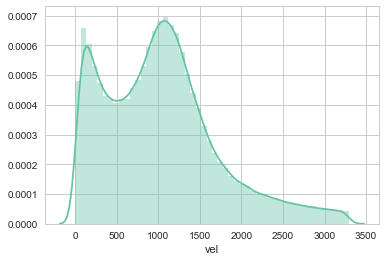

In [97]:
sns.distplot(df_data['vel'])

In [102]:
df_data.describe()

,index,id,new_frame,frame,wx,wz,vel,dist,minD
count,194983.000000,194983.000000,194983.000000,1.949830e+05,194983.000000,194983.000000,194983.000000,194983.000000,194983.000000
mean,126811.957360,121971.560449,43354.527220,8.670987e+05,1066.146023,6039.418063,1035.758798,626.923549,2376.938025
std,72825.906289,73472.468370,24893.784559,4.978755e+05,1852.550390,4346.496260,691.983256,523.193495,1297.489556
min,2.000000,0.000000,3.000000,6.714286e+01,-4052.934000,183.629667,0.221536,0.147691,0.333270
25%,65433.500000,62082.000000,22565.500000,4.513164e+05,-294.187260,3821.745000,493.324272,280.418717,1447.137639
50%,121256.000000,107623.000000,40384.000000,8.076895e+05,993.002950,5071.432222,991.439120,550.377949,2244.054811
75%,188859.500000,180627.000000,64086.000000,1.281730e+06,2148.129625,6413.945447,1391.737093,816.708608,3166.774008
max,265945.000000,281987.000000,94735.000000,1.894701e+06,7445.552500,28427.500000,3291.268103,9006.484050,7283.412996


平均

In [103]:
people_mean = df_data.groupby('id').mean()
people_max = df_data.groupby('id').max()
people_min = df_data.groupby('id').min()

In [104]:
people = pd.DataFrame()

In [105]:
people['minV'] = people_min['vel']
people['maxV'] = people_max['vel']
people['meanV'] = people_mean['vel']
people['minD'] = people_mean['minD']

クラスタリング

In [118]:
remove_n = 58000 #167459.000000/2
drop_indices = np.random.choice(people.index, remove_n, replace=False)
people_subset = people.drop(drop_indices)

In [119]:
people_subset.describe()

,minV,maxV,meanV,minD
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,915.354664,1442.818255,1147.082102,2307.052266
std,695.702053,783.559618,635.587540,1174.245700
min,1.773370,1.966077,1.966077,9.005776
25%,341.534025,939.813203,752.159088,1488.878578
50%,845.998660,1360.098196,1106.095159,2198.272380
75%,1253.868497,1916.274576,1455.139239,3017.363201
max,3290.191342,3290.333269,3290.191342,7247.163780


In [120]:
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import mixture

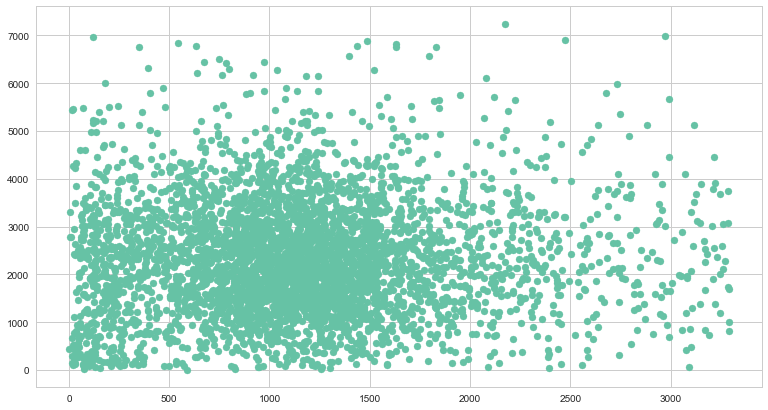

In [121]:
# pca = PCA(n_components=2)
# pca.fit(people_subset)
# X_reduced = pca.transform(people_subset)

fig = plt.figure(figsize=(13,7))
pl.scatter(people_subset['meanV'], people_subset['minD']);

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users

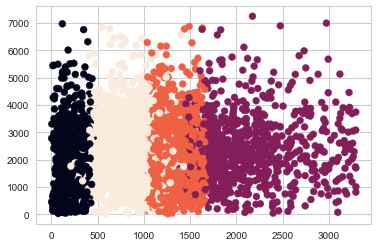

In [122]:
em = mixture.GMM(n_components=4)
em.fit(people_subset)
y_pred_em = em.predict(people_subset)
pl.scatter(people_subset['meanV'], people_subset['minD'], c=y_pred_em);

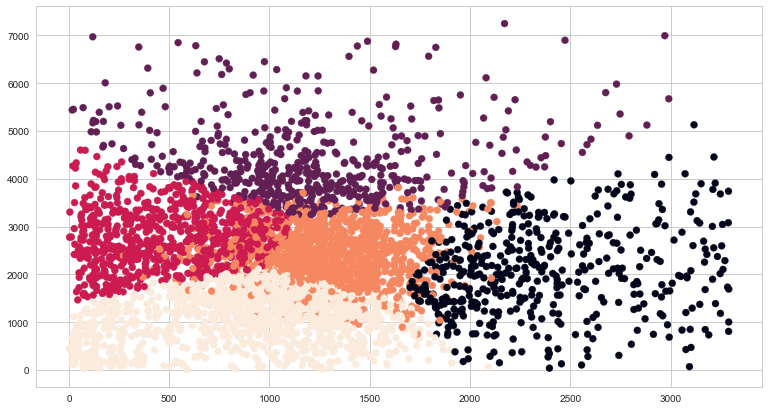

In [124]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=0) # Fixing the RNG in kmeans
k_means.fit(people_subset)
y_pred_k = k_means.predict(people_subset)

fig = plt.figure(figsize=(13,7))
pl.scatter(people_subset['meanV'], people_subset['minD'], c=y_pred_k);

In [66]:
people_subset.describe()

,minV,maxV,meanV,minD
count,846.000000,846.000000,846.000000,846.000000
mean,914.189867,1420.415127,1135.357502,2341.723669
std,631.007391,677.997431,565.712513,1122.972138
min,4.026338,20.471304,20.471304,7.005316
25%,439.138420,993.371424,814.282545,1578.883735
50%,910.112097,1361.136607,1098.524433,2249.807343
75%,1217.945619,1841.655283,1419.537075,2973.171874
max,3231.179211,3231.179211,3231.179211,6815.240856
